In [116]:
import pandas as pd
from googletrans import Translator
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
appleset = pd.read_csv('../AppleStore.csv', header = 0)


In [225]:
appleset.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [ ]:
appleset.index

In [ ]:
appleset.values

In [ ]:
appleset.shape

In [ ]:
appleset.info()

In [ ]:
type(pd.read_csv('../AppleStore.csv'))
print(appleset.shape)
print(appleset.keys())

In [ ]:
# simple duplicated row check
appleset.duplicated()

<AxesSubplot:xlabel='user_rating', ylabel='count'>

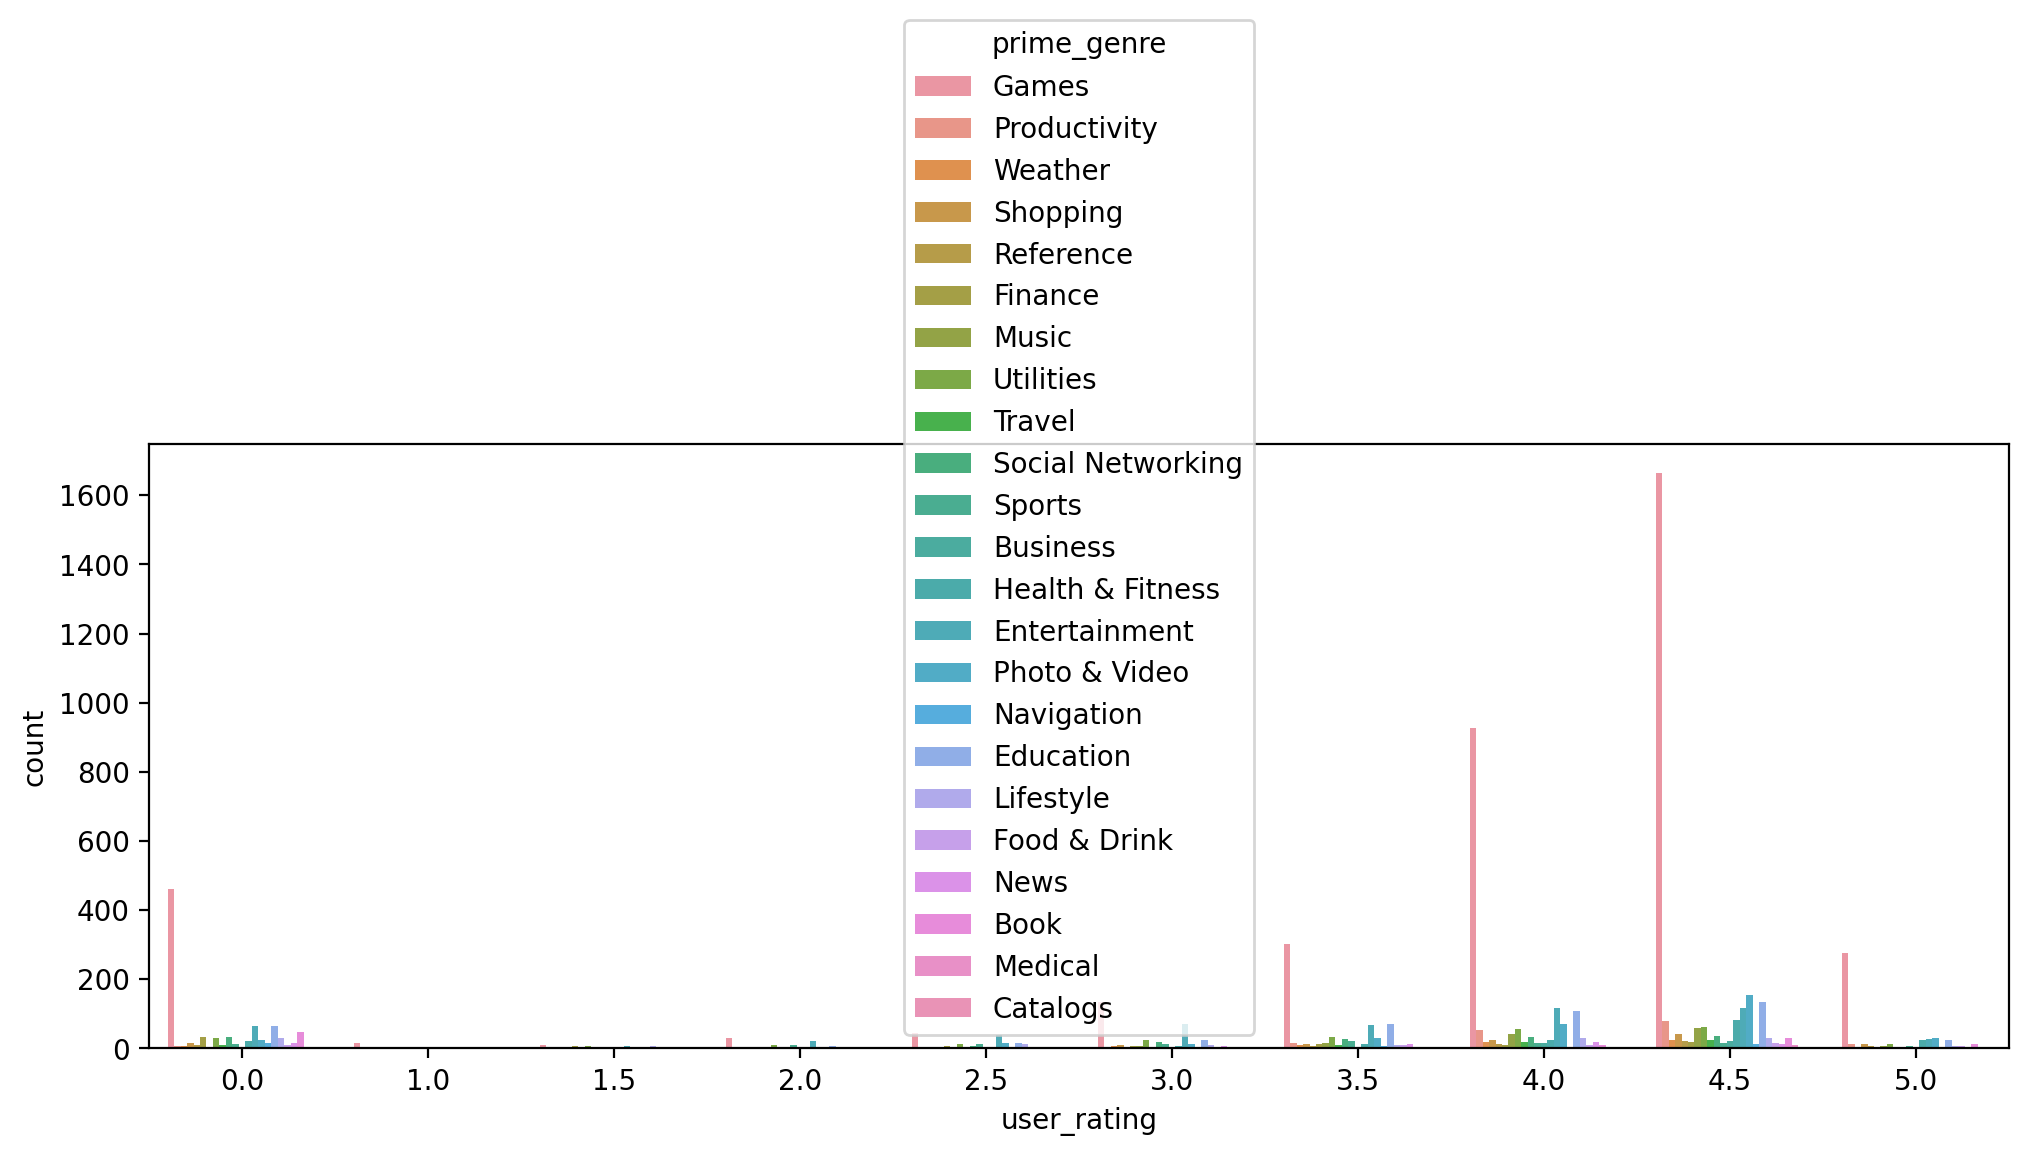

In [232]:
appleset['user_rating'].value_counts()
plt.figure(figsize=(12,4),dpi=200)
sns.countplot(data=appleset, x='user_rating', hue='prime_genre')
# sns.countplot(data=appleset, x='prime_genre', hue='user_rating')

<AxesSubplot:xlabel='cont_rating', ylabel='count'>

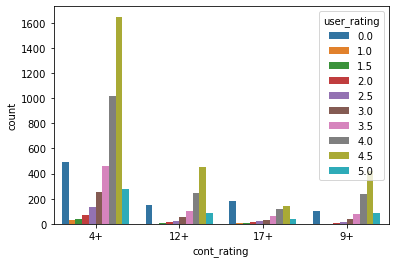

In [233]:
appleset['cont_rating'].value_counts()
sns.countplot(data=appleset, x='cont_rating')
sns.countplot(data=appleset, x='cont_rating', hue='user_rating')
sns.countplot(data=appleset, x='cont_rating', hue='user_rating')

<AxesSubplot:xlabel='prime_genre', ylabel='count'>

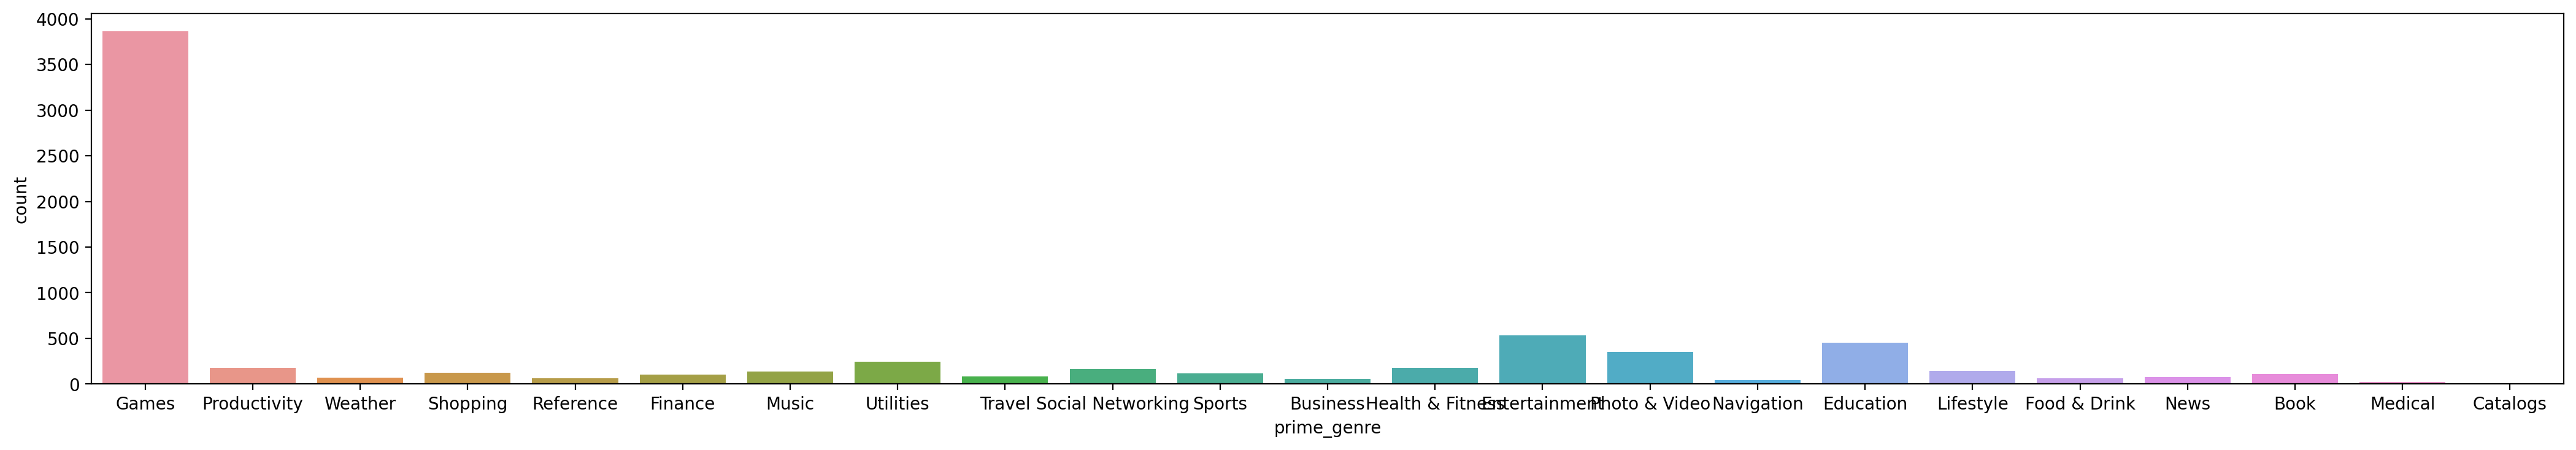

In [209]:
appleset['prime_genre'].value_counts()

plt.figure(figsize=(26,4),dpi=200)
sns.countplot(data=appleset, x='prime_genre')


In [ ]:
# #unique values == True
# pd.Series(appleset['id']).is_unique 

In [162]:
appleset.head(1)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1


<Figure size 2400x800 with 0 Axes>

<AxesSubplot:xlabel='price'>

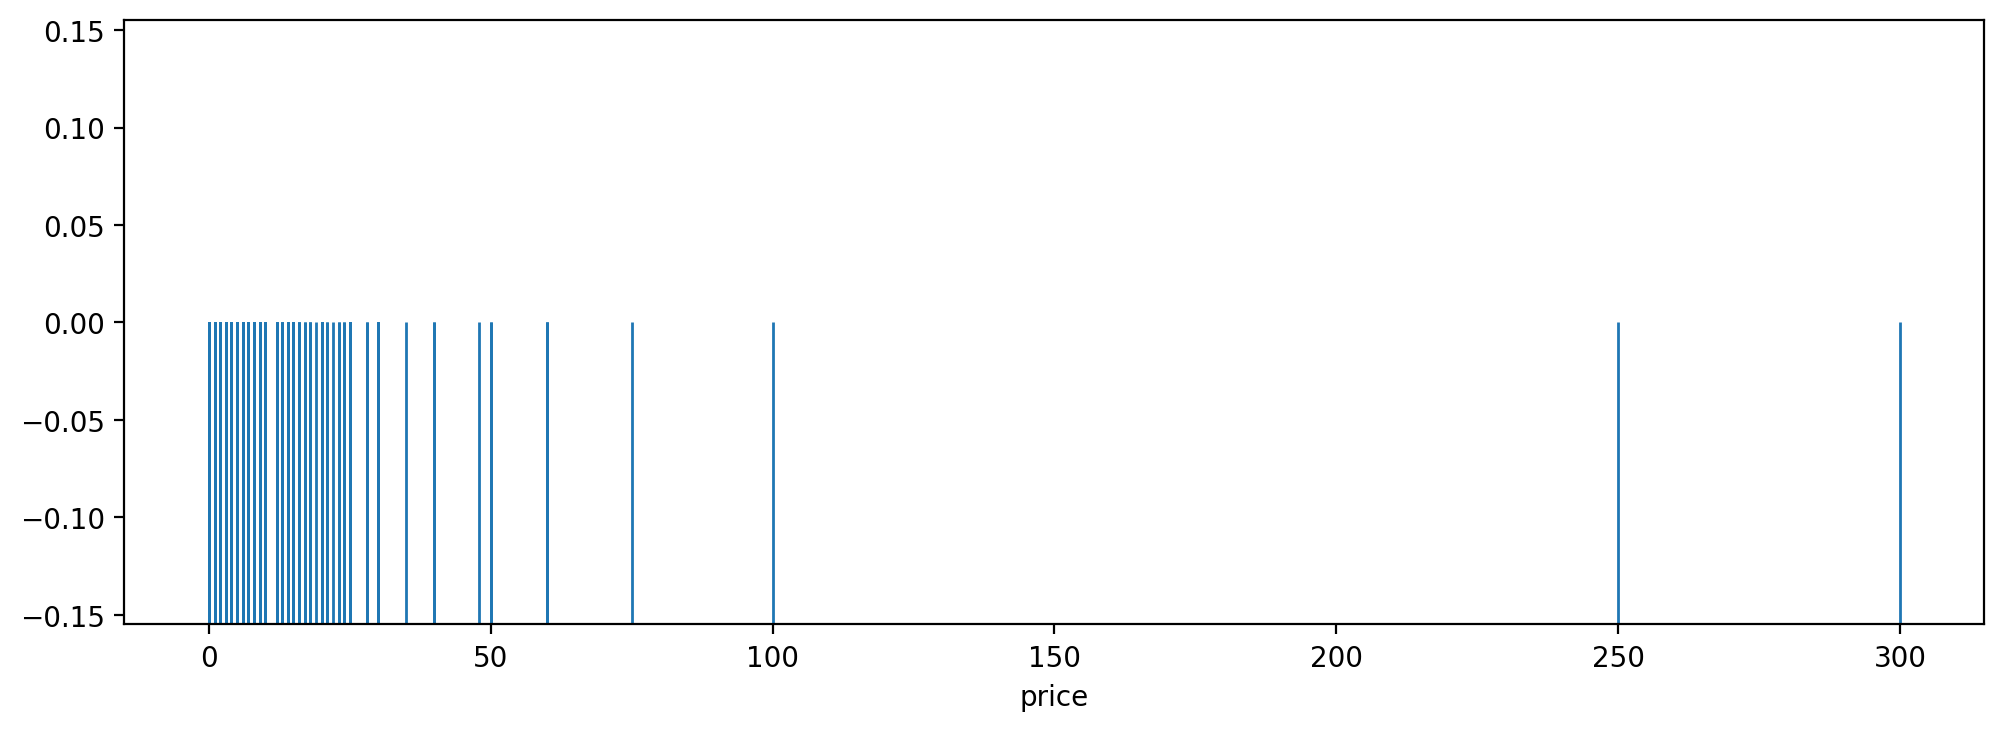

In [218]:
translator = Translator()

#Top 20 highest priced apps
Highest_priced = appleset[['id','prime_genre', 'track_name', 'price']].nlargest(20, 'price')
Highest_priced

# top 20 
prices = appleset['price']

plt.figure(figsize=(12,4),dpi=200)
plt.show()
# plt.plot(prices, appleset['prime_genre'])
# sns.countplot(x='price', data=appleset)

plt.show()
plt.figure(figsize=(12,4),dpi=200)
sns.rugplot(x='price', data=appleset, height=.5)

# sns.rugplot(x='rating_count_tot', data=appleset, height=50)

In [ ]:
# #Update record to english < 10 apps
appleset.loc[778]
appleset.loc[778, 'track_name'] = translator.translate('プチ・ロワイヤル仏和辞典（第4版）・和仏辞典（第3版）', dest='en', src='auto').text

# #Update record to english < 20 apps
appleset.loc[1188]
appleset.loc[1188, 'track_name'] = translator.translate('美食杰-让吃饭变简单(VIP版)', dest='en', src='auto').text
appleset.loc[1188]

In [28]:
appleset.loc[778]['track_name']
appleset.loc[1188]['track_name']

'Petit Royale Buddha Japanese Dictionary (4th Edition) · Japanese Buddha Dictionary (3rd Edition)'

In [ ]:
#Set index to id
appleset = appleset.set_index('id')

In [ ]:
appleset.head(5)

<AxesSubplot:xlabel='cont_rating', ylabel='count'>

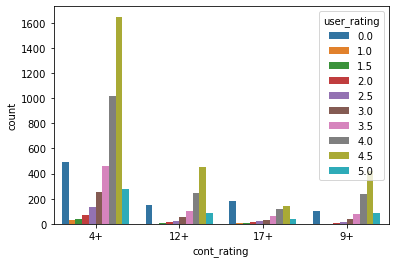

In [235]:
appleset[['track_name','user_rating']].nlargest(20, 'user_rating')


five_star_user = appleset['user_rating']
five_star_user
cont_rating = appleset['cont_rating']
appleset[['id','cont_rating']].groupby('cont_rating').count()
appleset['cont_rating'].value_counts()                                                                        
# five_star_user_20 = five_star_user.head(20)

# plt.plot(five_star_user, appleset['cont_rating'])

sns.countplot(data=appleset, x='cont_rating', hue='user_rating')


<AxesSubplot:xlabel='user_rating', ylabel='count'>

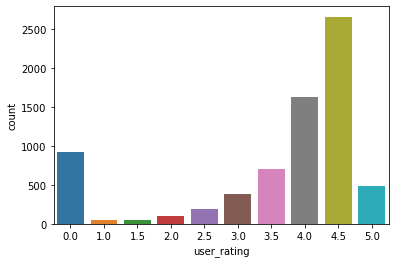

In [240]:
appleset[['track_name', 'user_rating', 'price']].nlargest(20, 'price')

# plt.plot(appleset['user_rating'], appleset['price'])
# #index 778 and 1188 track_names are in english

# appleset.loc[778]
# #Dictionary is almost $50 dollars with user_rating of 0 and no reviews as of yet. 

# sns.scatterplot(appleset['user_rating'], appleset['price'])
sns.countplot(x='user_rating', data=appleset)

In [199]:
#Genre categories
genre_cat = appleset['prime_genre']

#Genre counts
genre_count = len(appleset['prime_genre'].unique())

appleset['prime_genre'].value_counts()



Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64

In [147]:

# sample_set_en = appleset_en[['prime_genre', 'track_name','price']].groupby('prime_genre').max()

# #Doublechecking 
# eachcat = appleset[['id','prime_genre','price']].sort_values(['prime_genre','price'], ascending=False)
# appleset[['id','prime_genre','price']][eachcat['prime_genre']  == 'Education'].set_index('id').sort_values('price', ascending=False)

<ipython-input-147-4c82614019ea>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  appleset[['id','prime_genre','price']][eachcat['prime_genre']  == 'Education'].set_index('id').sort_values('price', ascending=False)


,prime_genre,price
id,,
551215116,Education,299.99
308368164,Education,249.99
491998279,Education,59.99
700440156,Education,59.99
373493387,Education,24.99
...,...,...
577232024,Education,0.00
570772231,Education,0.00
1034523226,Education,0.00


C:\Users\suzet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='prime_genre'>

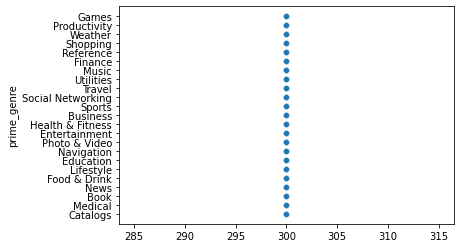

In [146]:
# # #highestprice for each genre. 
appleset.groupby('prime_genre').max('price')
sample_set = appleset[['id','prime_genre', 'track_name','price']].groupby('prime_genre').max()
sample_set

sns.scatterplot(appleset['price'].max() ,appleset['prime_genre'])

In [ ]:
sample_set.to_csv('Highestpriceappnonenglish.csv')

In [149]:
#For each genre there are so many paid apps

# appleset[(appleset['price'].groupby('price').any()) & (appleset['prime_genre'].groupby('prime_genre').count())]


In [150]:
# sample_set_en = appleset_en[['prime_genre', 'track_name','price']].groupby('prime_genre').max()
# sample_set_en

NameError: name 'appleset_en' is not defined

In [ ]:
from googletrans import Translator

translator = Translator()
results = translator.translate('Hola Amigos')
print(results.text)

In [ ]:
pip install google_trans_new

In [ ]:
from googletrans import Translator
import googletrans

#Verify the language of my track_names
translator = Translator(raise_exception=False)

def translatecol(values):
        for name, values in appleset['track_name'].iteritems():
            translator = Translator()
            response = translator.translate(values, dest='en')
    
print(translatecol(practice_translating['track_name']))
appleset['track_name'].sort_values(ascending=False)


In [ ]:
translator = Translator()
translations = {}
for column in sample_set['track_name']:
    translations[column]= translator.translate(column).text
    
print(translations)

In [ ]:
top_five = appleset.head()

In [ ]:
from googletrans import Translator
translator = Translator()
# appleset_en = appleset.copy()
# appleset_en['track_name'] = appleset_en['track_name'].map(lambda x: translator.translate(x, src='auto', dest='en').text)

sample_set_en['english'] = sample_set_en['track_name'].map(lambda x: translator.translate(x, src='auto', dest='en').text)
sample_set_en['english']


In [ ]:
sample_set_en.to_csv('Highestpriceappenglish.csv')

In [ ]:
#Receive error.  Possibly timeout
translator = Translator()
for name in appleset['track_name']:
    try:
        translator.detect(name)
    except KeyError:
        continue
#Something to continue working on in the future.  Data set is too large possibly.


In [8]:
# #google_trans_new
# from google_trans_new import google_translator  

# detector = google_translator()
# for name in appleset['track_name']:
#     try:
#         results = detector.detect(name)
#     except KeyError:
#         continue

# print(results)

Exception: 

In [4]:
# from google_trans_new import google_translator
# translator = google_translator()

# appleset_en = appleset.copy()
# translations = {}
# for column in appleset_en['track_name']:
#     unique_elements = appleset_en[column].unique()
#     for element in unique_elements:
#         try:
#             translations[element] = translator.translate(element, dest='en',src='auto').text
#         except KeyError:
#             continue
            

# print(translations)
# appleset_en.replace(translations, inplace=True)
# appleset_en.head()


KeyError: 'PAC-MAN Premium'

In [153]:
# Top 10 free apps with the highest rating count total and user rating at 5
appleset[(appleset['price'] == 0.00) & (appleset['user_rating'] == 5.0)].sort_values('rating_count_tot', ascending=False).nlargest(10, 'rating_count_tot')

# # #^ What are the top 10 genres free apps
# genre_free = appleset[(appleset['price'] == 0.00) & (appleset['user_rating'] == 5.0)].sort_values('rating_count_tot', ascending=False).nlargest(10, 'rating_count_tot')
# genre_free.groupby('prime_genre').count()['id']


# #What are the genres top 100, not sorted, free apps
# genre_free_100 = appleset[(appleset['price'] == 0.00) & (appleset['user_rating'] == 5.0)].sort_values('rating_count_tot', ascending=False).nlargest(100, 'rating_count_tot')
# genre_free_100.groupby('prime_genre').count()['id']
                                            


# # #Does having more supporting devices give a better score for top free apps?
# #It seems the more number of supporting devices the better chance to have a high score according to top 100

# # What is the mean of supporting devices for top 100
mean_supp = appleset[(appleset['price'] == 0.00) & (appleset['user_rating'] == 5.0)].sort_values('rating_count_tot', ascending=False).nlargest(100, 'rating_count_tot')
mean_supp
# mean_supp['sup_devices.num'].mean()
# # # #result 37.71

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1104,1289,487119327,Head Soccer,121319424,USD,0.0,481564,8518,5.0,5.0,5.4.1,4+,Games,40,4,11,1
3086,3694,930574573,Sniper 3D Assassin: Shoot to Kill Gun Game,157851648,USD,0.0,386521,10332,5.0,5.0,1.17.6,17+,Games,40,5,9,1
2177,2537,698255242,Geometry Dash Lite,69076992,USD,0.0,370370,2650,5.0,4.5,2.11,4+,Games,37,4,1,1
810,922,436491861,Domino's Pizza USA,105743360,USD,0.0,258624,2481,5.0,4.5,4.2.0,4+,Food & Drink,37,5,2,1
2731,3254,887947640,CSR Racing 2,1944321024,USD,0.0,257100,2025,5.0,5.0,1.11.3,4+,Games,37,5,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6455,9388,1130610367,Donut Dazzle,65595392,USD,0.0,2317,102,5.0,4.5,1.3,4+,Games,37,0,1,1
6399,9256,1126835894,Epic Jackpot Slots: Slot Machines & Bonus Games,181364736,USD,0.0,2291,116,5.0,5.0,1.111,12+,Games,40,5,10,1
3798,4660,995014054,Pinchworm,100635648,USD,0.0,2288,74,5.0,5.0,1.0.5,4+,Games,37,5,11,1
2665,3171,876336838,喜马拉雅FM（听书社区）电台有声小说相声英语,130731008,USD,0.0,2111,0,5.0,0.0,6.3.6,12+,Book,37,5,2,1


In [54]:
#Top 10 paid apps, highest rating count total and user rating at 5.0
appleset[(appleset['price'] > 0.00) & (appleset['user_rating'] == 5.0)].sort_values('rating_count_tot', ascending=False).nlargest(10, 'rating_count_tot')

# # #^What are the top 10 genres
genre_paid = appleset[(appleset['price'] > 0.00) & (appleset['user_rating'] == 5.0)].sort_values('rating_count_tot', ascending=False).nlargest(10, 'rating_count_tot')
genre_paid.groupby('prime_genre').count()['id']

# # #^What are the top 100 genres, not sorted
genre_paid = appleset[(appleset['price'] > 0.00) & (appleset['user_rating'] == 5.0)].sort_values('rating_count_tot', ascending=False).nlargest(100, 'rating_count_tot')
genre_paid.groupby('prime_genre').count()['id']

# # # #Top 100 paid apps, average supporting_devices
mean_paid_Supp = appleset[(appleset['price'] > 0.00) & (appleset['user_rating'] == 5.0)].sort_values('rating_count_tot', ascending=False).nlargest(100, 'rating_count_tot')
mean_paid_Supp
# mean_paid_Supp['sup_devices.num'].mean()
# # # #36.94

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
302,341,350642635,Plants vs. Zombies,105379840,USD,0.99,426463,680,5.0,4.0,1.9.13,9+,Games,38,0,5,1
498,568,387428400,Infinity Blade,624107810,USD,0.99,326482,177050,5.0,5.0,1.4.1,12+,Games,43,5,13,1
1877,2180,625334537,Geometry Dash,83931136,USD,1.99,266440,6263,5.0,4.5,2.10,4+,Games,37,4,1,1
350,396,363282253,Plants vs. Zombies HD,225859584,USD,0.99,163598,503,5.0,4.0,1.9.12,9+,Games,24,5,5,1
1484,1721,552039496,The Room,338273280,USD,0.99,143908,1056,5.0,5.0,1.0.4,9+,Games,24,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3579,4353,976690555,Patterning : Drum Machine,134340608,USD,9.99,306,21,5.0,5.0,1.2.3,4+,Music,24,5,8,1
4101,5105,1022268606,Beat da Beat,262926336,USD,0.99,301,180,5.0,5.0,1.3,9+,Games,40,4,1,1
2081,2421,671123035,Burger Shop,25294848,USD,0.99,299,18,5.0,5.0,1.2,4+,Games,40,0,12,1
4391,5555,1041465860,Model 15,205972480,USD,29.99,298,35,5.0,5.0,1.1.1,4+,Music,25,5,1,1


In [222]:
#Count of all genres
appleset['prime_genre'].value_counts()

Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64

In [155]:
applesetdetails = pd.read_csv('../AppleStore_description.csv', header = 0)

In [161]:
#Combining two different data sets
applefulldetails = pd.concat([appleset, applesetdetails['app_desc']], axis=1)
applefulldetails

#Cleaning new table by grabbing data I want
appledescdetails = applefulldetails[['id','track_name','app_desc','prime_genre','price','rating_count_tot','user_rating','cont_rating','sup_devices.num','lang.num']]
appledescdetails

# appledescdetails['track_name'].sort_values(ascending=False)

,id,track_name,app_desc,prime_genre,price,rating_count_tot,user_rating,cont_rating,sup_devices.num,lang.num
0,281656475,PAC-MAN Premium,"SAVE 20%, now only $3.99 for a limited time!\n...",Games,3.99,21292,4.0,4+,38,10
1,281796108,Evernote - stay organized,Let Evernote change the way you organize your ...,Productivity,0.00,161065,4.0,4+,37,23
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",Download the most popular free weather app pow...,Weather,0.00,188583,3.5,4+,37,3
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",The eBay app is the best way to find anything ...,Shopping,0.00,262241,4.0,12+,37,9
4,282935706,Bible,On more than 250 million devices around the wo...,Reference,0.00,985920,4.5,4+,37,45
...,...,...,...,...,...,...,...,...,...,...
7192,1187617475,Kubik,Place the falling blocks correctly in order to...,Games,0.00,142,4.5,4+,38,1
7193,1187682390,VR Roller-Coaster,A thrilling virtual reality roller coaster exp...,Games,0.00,30,4.5,4+,38,1
7194,1187779532,Bret Michaels Emojis + Lyric Keyboard,"Rock star Bret Michaels, winner of Celebrity A...",Utilities,1.99,15,4.5,9+,37,1
7195,1187838770,VR Roller Coaster World - Virtual Reality,VR Roller Coaster World is an app for Google C...,Games,0.00,85,4.5,12+,38,2


In [224]:
#Questions
#Content_Rating does that have an effect on rating count, user rating?

# iOS and iPadOS App Store
# Main article: App Store (iOS) § Application ratings

# Apple's rating system for the App Store follows the following rubric:[1]

#     Rated 4+: Contains no objectionable material.
#     Rated 9+: May contain content unsuitable for children under the age of 9.
#     Rated 12+: May contain content unsuitable for children under the age of 12.
#     Rated 17+: May contain content unsuitable for children under the age of 17.

# Apps rated 17+ are prohibited from purchase by younger users.[2] 


appleset['cont_rating'].unique()

appleset['cont_rating'].value_counts()
appleset[['cont_rating','rating_count_tot']].groupby('cont_rating').sum('rating_count_tot')

# appleset[['cont_rating','rating_count_tot']].

#Which cont_rating has the highest 5.0 user_ratings...

# fivestar = appleset[['id','user_rating']] == 5.0
# appleset[fivestar].groupby('user_rating').count()



,rating_count_tot
cont_rating,
12+,20258035
17+,6060707
4+,52927741
9+,13543770


In [5]:
appleset

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,11081,1187617475,Kubik,126644224,USD,0.00,142,75,4.5,4.5,1.3,4+,Games,38,5,1,1
7193,11082,1187682390,VR Roller-Coaster,120760320,USD,0.00,30,30,4.5,4.5,0.9,4+,Games,38,0,1,1
7194,11087,1187779532,Bret Michaels Emojis + Lyric Keyboard,111322112,USD,1.99,15,0,4.5,0.0,1.0.2,9+,Utilities,37,1,1,1
7195,11089,1187838770,VR Roller Coaster World - Virtual Reality,97235968,USD,0.00,85,32,4.5,4.5,1.0.15,12+,Games,38,0,2,1


In [ ]:
applesetdetails['app_desc']

In [ ]:
#combine csv files to create one new dataframe. 